<a href="https://colab.research.google.com/github/mohikhan/CSE-676-Assignment-1/blob/main/CSE_676_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Submitted by:
Mohiuddeen Khan

Ub IT: mohiudde

Person No: 50464453

In [53]:
#Importing the libraries
import numpy as np         
import pandas as pd
import matplotlib.pyplot as plt      
import random                        
from keras.datasets import mnist     
from keras.models import Sequential  
from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils 

In [54]:
#Loading the MNIST dataset and splitting into training and testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


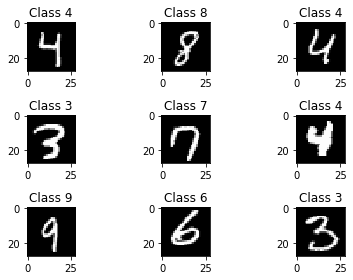

In [55]:
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [28]:
#Doing data preprocessing here to make 
# the network accept a 784-length vector
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)   

X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

X_train /= 255                        
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [31]:

total_class = 10
Y_train = np_utils.to_categorical(y_train, total_class)
Y_test = np_utils.to_categorical(y_test, total_class)

In [32]:
# 3 layer neural network with 512 neurons for the first hidden layer
# 256 neurons for the secoond hidden layer 
# 10 neurons in the output layer

model = Sequential()
model.add(Dense(512, input_shape=(784,))) 
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [33]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 activation_9 (Activation)   (None, 512)               0         
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 activation_10 (Activation)  (None, 256)               0         
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 10)               

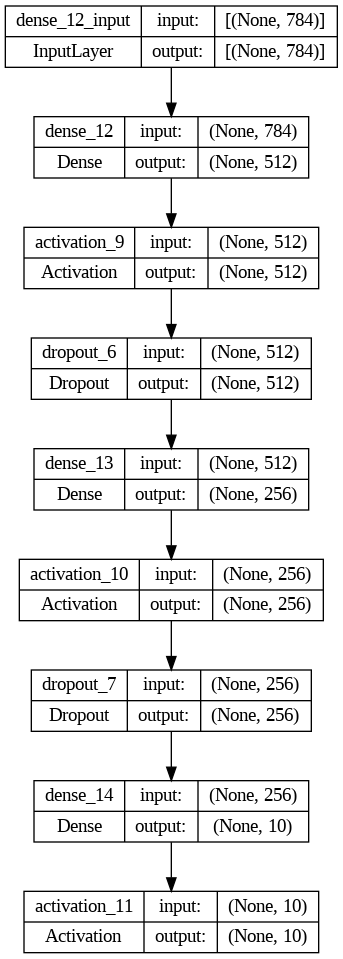

In [34]:
from keras.utils import plot_model
plot_model(model, to_file='model_chart.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model_chart.png")

In [35]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
# Training the model
hs = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=1)

Epoch 1/10
469/469 [==============================] - 9s 17ms/step - loss: 0.2680 - accuracy: 0.9199
Epoch 2/10
469/469 [==============================] - 8s 18ms/step - loss: 0.1057 - accuracy: 0.9677
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0751 - accuracy: 0.9769
Epoch 4/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0575 - accuracy: 0.9821
Epoch 5/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0478 - accuracy: 0.9847
Epoch 6/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0410 - accuracy: 0.9864
Epoch 7/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0338 - accuracy: 0.9888
Epoch 8/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0321 - accuracy: 0.9895
Epoch 9/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0267 - accuracy: 0.9909
Epoch 10/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0248 - accura

In [40]:
score = model.evaluate(X_test, Y_test)
print('Test accuracy of the model is', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0694 - accuracy: 0.9833
Test accuracy of the model is 0.983299970626831


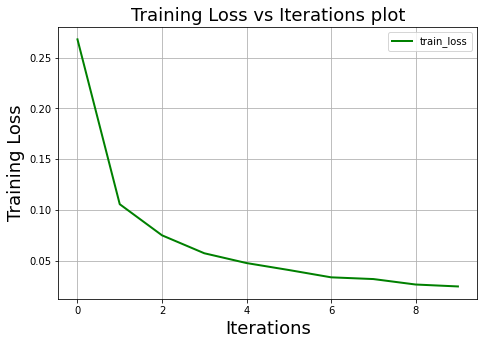

In [48]:
#Computing the graphs 
plt.figure(figsize=(7.5, 5))
plt.plot(hs.history["loss"],label="train_loss", color='green', linewidth=2)
plt.xlabel('Iterations',color='black', fontsize=18)
plt.ylabel('Training Loss',color='black', fontsize=18)
plt.title('Training Loss vs Iterations plot', fontsize=18)
plt.legend()
plt.grid()
plt.show()
plt.close()

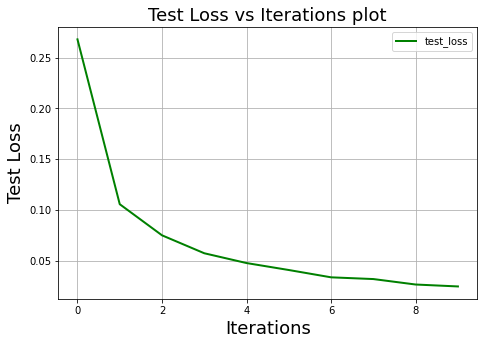

In [51]:
plt.figure(figsize=(7.5, 5))
plt.plot(hs.history["loss"],label="test_loss", color='green', linewidth=2)
plt.xlabel('Iterations',color='black', fontsize=18)
plt.ylabel('Test Loss',color='black', fontsize=18)
plt.title('Test Loss vs Iterations plot', fontsize=18)
plt.legend()
plt.grid()
plt.show()
plt.close()